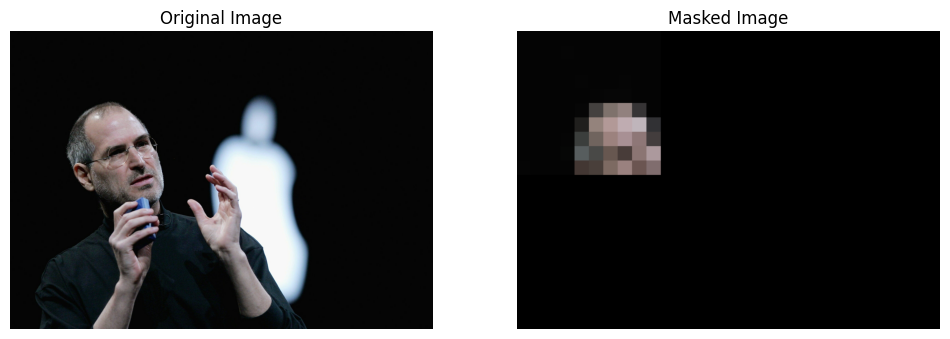

In [15]:
from PIL import Image, ImageDraw
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Функция для создания пиксельной маски
def create_pixel_mask(image_url, y_min, y_max, x_min, x_max, h):
    # Загрузка изображения по URL
    response = requests.get(image_url)
    orig_img = Image.open(BytesIO(response.content))

    # Получение размеров изображения
    width, height = orig_img.size

    # Расчет размеров области
    region_width = (x_max - x_min) // h
    region_height = (y_max - y_min) // h

    # Создание пустой маски
    mask = np.zeros_like(np.array(orig_img), dtype=np.uint8)

    # Инициализация списка для средних цветов
    average_colors = []

    # По всем областям и усредняем цвет
    for i in range(h):
        for j in range(h):
            y_start = y_min + i * region_height
            y_end = y_min + (i + 1) * region_height
            x_start = x_min + j * region_width
            x_end = x_min + (j + 1) * region_width

            # Вычисляем средний цвет в текущей области
            region = orig_img.crop((x_start, y_start, x_end, y_end))
            average_color = np.mean(region, axis=(0, 1))
            average_colors.append(average_color)

            # Заполняем маску средним цветом
            mask[y_start:y_end, x_start:x_end] = average_color.astype(np.uint8)

    # Создаем изображение маски
    mask_image = Image.fromarray(mask, 'RGB')

    # Объединяем исходное изображение и маску
    masked_image = orig_img.copy()
    masked_image.paste(mask_image, (0, 0))

    return orig_img, masked_image

# Пример использования функции
original_image, masked_image = create_pixel_mask('https://wallpapercosmos.com/w/full/4/a/3/91636-3000x2112-desktop-hd-steve-jobs-background.jpg',
y_min=0, y_max=768, x_min=0, x_max=1024, h=10)

# Сохранение результатов
original_image.save('original_image.jpg')
masked_image.save('masked_image.jpg')

# Отображение результатов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Masked Image')
plt.axis('off')

plt.show()
